BUSINESS UNDERSTANDING


DATA UNDERSTANDING 

Loading Data

In [1]:
# loading all the necessary libraries
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import csv

# Data Preparation


Loading the first dataset

In [2]:
#loading the test_set_features dataset
test_set_features=pd.read_csv ('test_set_features.csv')
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#checking for all the information on the dataset
test_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [4]:
#checking the shape of the dataset
test_set_features.shape

(26708, 36)

Dealing with missing values 

In [5]:
#finding any null and missing values 
test_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [6]:
#filling the missing values with 0 & 1 as per the instructions
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance','household_adults','household_children']
#filling labels with 1 
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

test_set_features[features]=test_set_features[features].fillna(0)
test_set_features[labels]=test_set_features[labels].fillna(1)

In [7]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

test_set_features[basics] = test_set_features[basics].fillna('Nill')
test_set_features[occupation] = test_set_features[occupation].fillna('Nill')

In [8]:
#rechecking for missing values
test_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Checking For Duplicates

In [9]:
#checking for any duplicates in the dataset
test_set_features.duplicated().sum()

0

Loading the second dataset

In [10]:
#loading the training_set_features dataset
training_set_features=pd.read_csv ('training_set_features.csv')
training_set_features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [11]:
#checking for the info and shape of the dataset
training_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
#checking for the shape of the dataset
training_set_features.shape

(26707, 36)

Dealing with duplicates and missing values

In [13]:
#checking for duplicates in the dataset
training_set_features.duplicated().sum()

0

In [14]:
#dealing with missing values
training_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [15]:
#filling the missing values with 0 & 1 
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance', 'household_adults','household_children']

#filling labels with 1
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

training_set_features[features]=training_set_features[features].fillna(0)
training_set_features[labels]=training_set_features[labels].fillna(1)

In [16]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

training_set_features[basics] = training_set_features[basics].fillna('Nill')
training_set_features[occupation] = training_set_features[occupation].fillna('Nill')

In [17]:
training_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Loading the third dataset

In [18]:
#loading the training_set_labels dataset
training_set_labels=pd.read_csv ('training_set_labels.csv')
training_set_labels.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


In [19]:
#checking for info
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [20]:
#checking for number of rows and columns on the dataset 
training_set_labels.shape

(26707, 3)

In [21]:
#checking for duplicates
training_set_labels.duplicated().sum()

0

In [22]:
#loading the submission_format dataset
submission_format=pd.read_csv ('submission_format.csv')
submission_format.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
5,26712,0.5,0.7
6,26713,0.5,0.7
7,26714,0.5,0.7
8,26715,0.5,0.7
9,26716,0.5,0.7


Merging relevant datasets 



Setting index for both of the datasets that will be merged

In [23]:
#merging the training_features and training_set_labels 
#set index for the merged dataset 
training_set_features.set_index('respondent_id')
training_set_features.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [24]:
training_set_labels.set_index('respondent_id')
training_set_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [25]:
#merging the datasets
features_and_labels = training_set_features.merge(training_set_labels, on = 'respondent_id', how ='inner')
features_and_labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [26]:
#rechecking for missing values
features_and_labels.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

# Exploratory Data Analysis (EDA)

EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant because it reveals trends, patterns, and linkages that are not readily apparent.

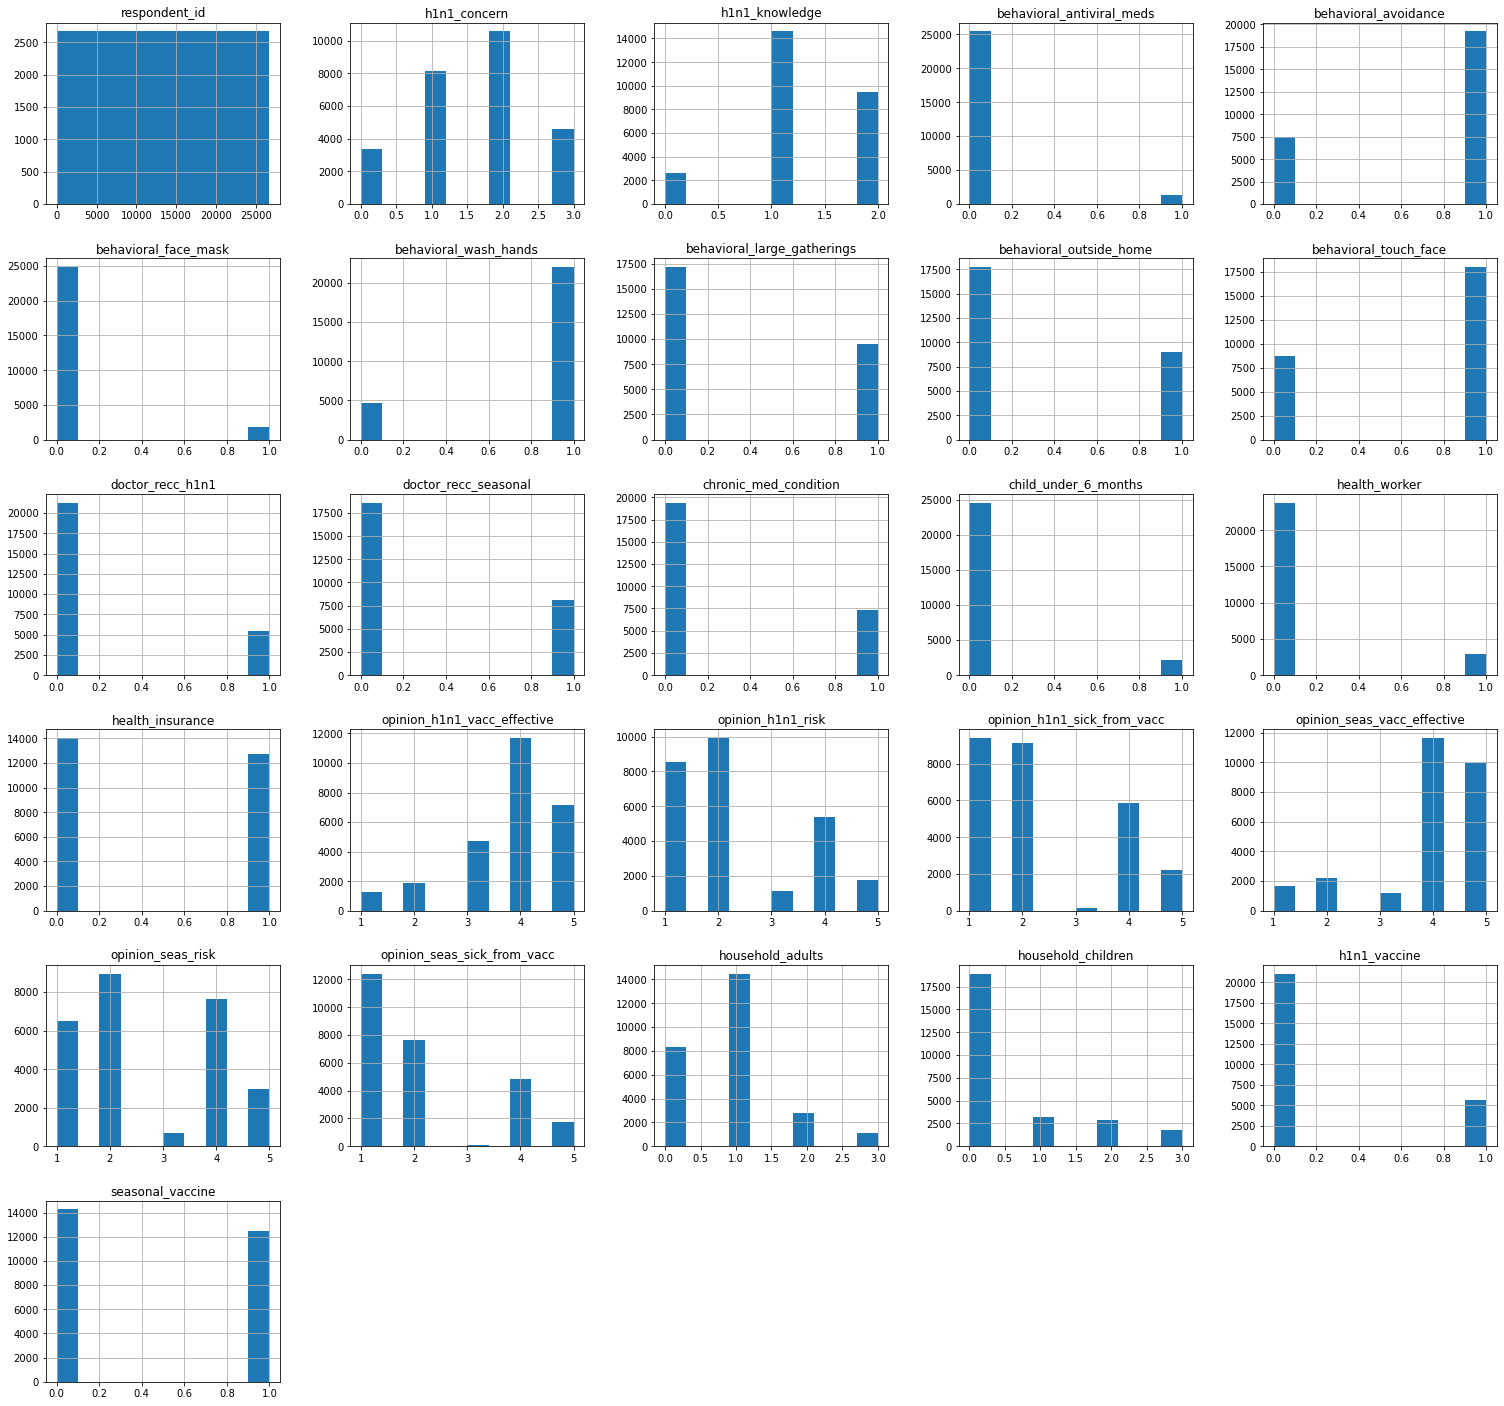

In [27]:
features_and_labels.hist(figsize=(26,25))
plt.show();

The charts demonstrate the many relationships between them and the effects they have on each other.

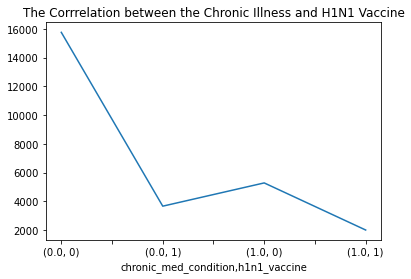

In [62]:
#Visualizing the Corrrelation between the Chronic Illness Patients and H1N1 Vaccine
chronic_vacc = features_and_labels.groupby('chronic_med_condition')
chronic_vacc['h1n1_vaccine'].value_counts().plot(kind="line", title = 'The Corrrelation between the Chronic Illness and H1N1 Vaccine');

This graph demonstrates that less than 2,000 persons with chronic illness took the H1N1 vaccine. 

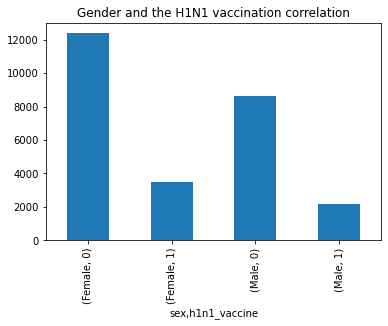

In [59]:
#Visualizing the Corrrelation between gender and h1n1 vaccine
gen_and_vacc = features_and_labels.groupby('sex')
gen_and_vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'Gender and the H1N1 vaccination correlation');

This plot shows that more women than men received the H1N1 vaccine.

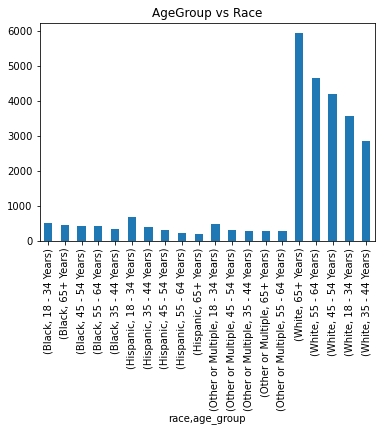

In [66]:
#visualizing  the correlation between race and agegroup
race_and_age =features_and_labels.groupby('race')
race_and_age['age_group'].value_counts().plot(kind="bar", title = 'AgeGroup vs Race');

The plot suggests that there were more white people between the ages of 35 and 65 followed by Hispanic between the ages of 18 and 34 and other or by multiples of the same age bracket as Hispanic.

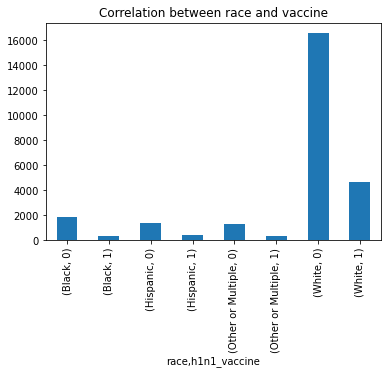

In [70]:
#Plotting a graph to find any correlation between race and the h1n1 vaccine
vacc_and_race =features_and_labels.groupby('race')
vacc_and_race['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'Correlation between race and vaccine');

More than 4000 white people, followed by Hispanic, other or multiple persons, and the least number of Black people, received the H1N1 vaccine.

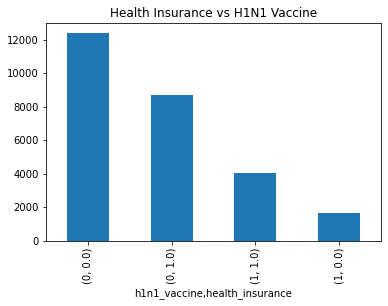

In [51]:
#Visualizing the relation that health insurance and h1n1 vaccine has
insurance_and_vacc =features_and_labels.groupby('h1n1_vaccine')
insurance_and_vacc['health_insurance'].value_counts().plot(kind="bar", title = 'Health Insurance vs H1N1 Vaccine');

Over 12,000 people without health insurance did not receive the H1N1 vaccine, compared to little over 4,000 people with insurance.

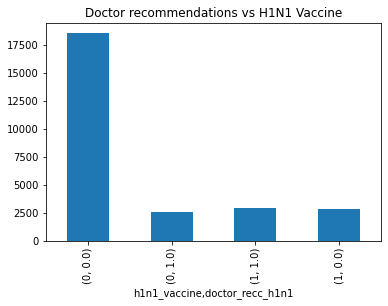

In [53]:
#visualizing doctors recommendation and h1n1 vaccine
doc_and_vacc =features_and_labels.groupby('h1n1_vaccine')
doc_and_vacc['doctor_recc_h1n1'].value_counts().plot(kind="bar", title = 'Doctor recommendations vs H1N1 Vaccine');

Over 2500 people received the H1N1 vaccine on doctors' recommendations, whereas more than 17500 declined to receive it.

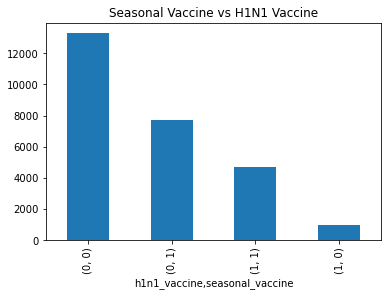

In [54]:
#visualizing the correlation btwn seasonal flu and h1n1 vaccine
seas_and_h1vacc =features_and_labels.groupby('h1n1_vaccine')
seas_and_h1vacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Seasonal Vaccine vs H1N1 Vaccine');

More than 4000 persons received both the H1N1 and seasonal flu vaccines. More than 12000 people skipped both.

# MODELLING